Step 1:Importing libararies and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [70]:
#warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()

Saving housing (1).csv to housing (1).csv


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [33]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [34]:
df.shape

(20433, 10)

In [35]:
df.nunique()

,0
longitude,844
latitude,861
housing_median_age,52
total_rooms,5911
total_bedrooms,1923
population,3879
households,1809
median_income,12825
median_house_value,3833
ocean_proximity,5


In [38]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


- Step 2 Data processing

In [21]:
object_cols = df.select_dtypes(include=['object']).columns
print("Categorical variables:", len(object_cols))

int_ = df.select_dtypes(include=['int64']).columns
print("Integer variables:", len(int_))

fl_cols = df.select_dtypes(include=['float64']).columns
print("Float variables:", len(fl_cols))

Categorical variables: 1
Integer variables: 0
Float variables: 9


- Step 3:Explotory Data Analysis

In [45]:
df.total_rooms.value_counts()

,count
total_rooms,
1527.0,18
1613.0,17
1582.0,17
2127.0,16
1703.0,15
...,...
15018.0,1
10509.0,1
4988.0,1


In [46]:
print('\n summary statictics')
print(df.describe())


 summary statictics
          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   

<Figure size 1200x800 with 0 Axes>

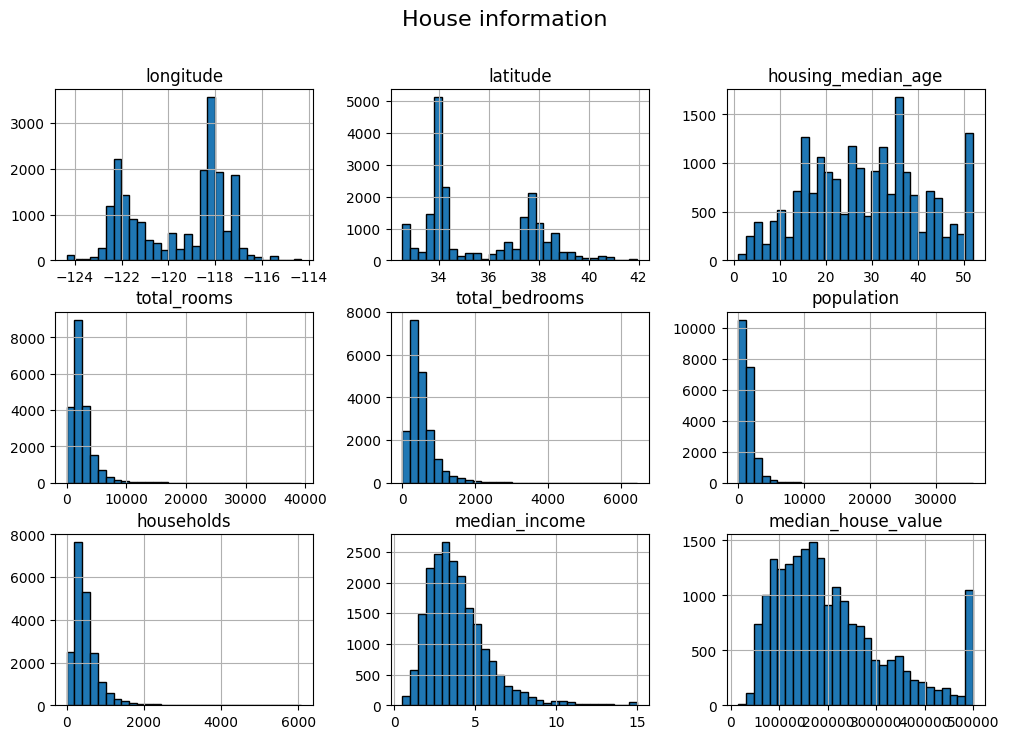

In [47]:
plt.figure(figsize=(12,8))
df.hist(figsize=(12,8),bins=30,edgecolor='black')
plt.suptitle('House information',fontsize=16)
plt.show()

Step 4:Data cleaning

House correlation_heatmap.png


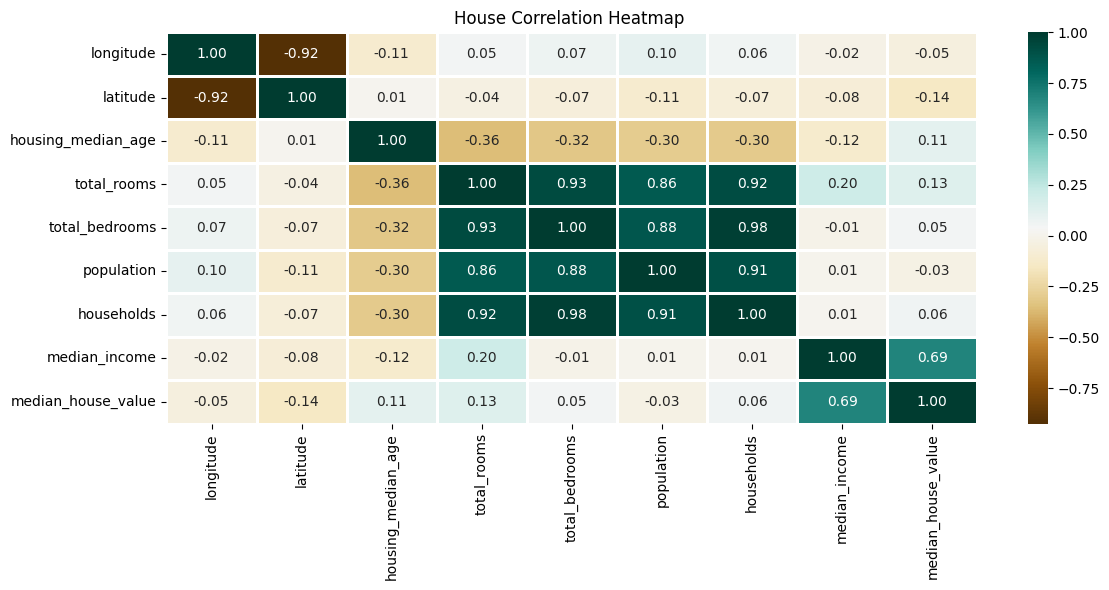

In [69]:
numerical_dataset = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12
                    , 6))
sns.heatmap(numerical_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.title("House Correlation Heatmap ")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
print("House correlation_heatmap.png")

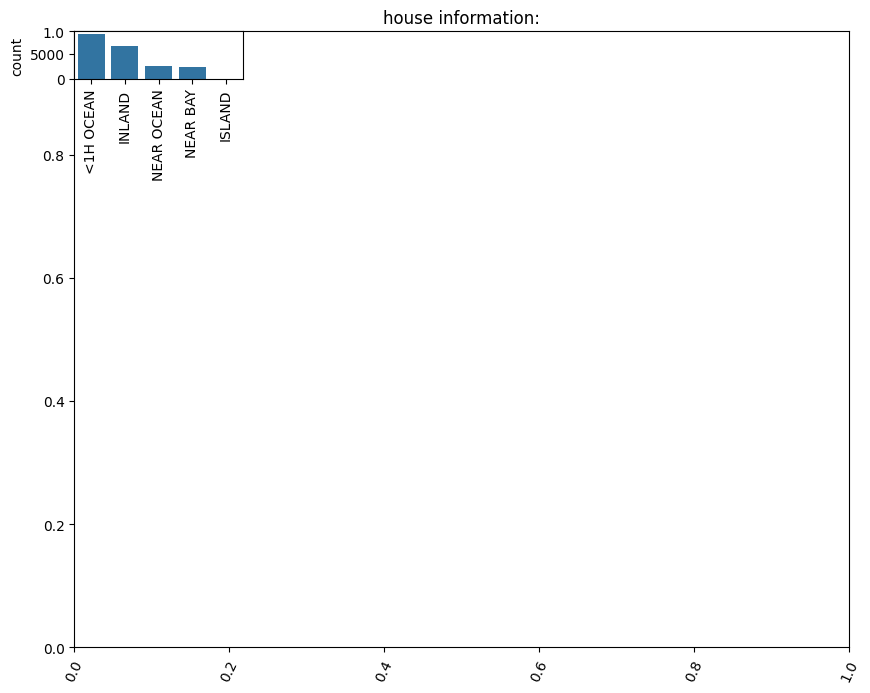

In [63]:
plt.figure(figsize=(10, 8))
plt.title('house information:')
plt.xticks(rotation=65)
index = 1

for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

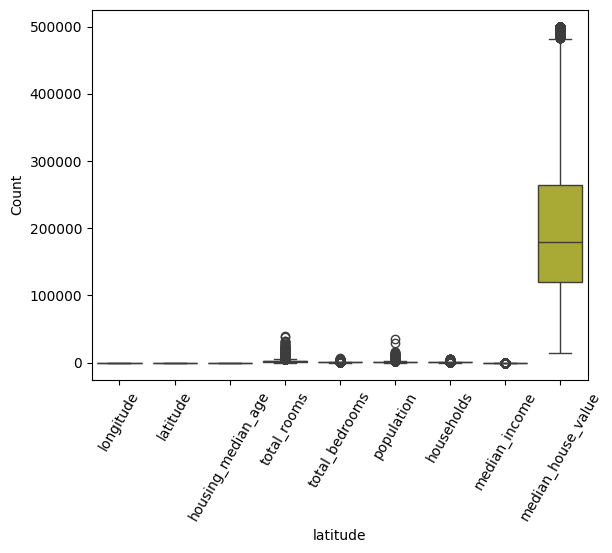

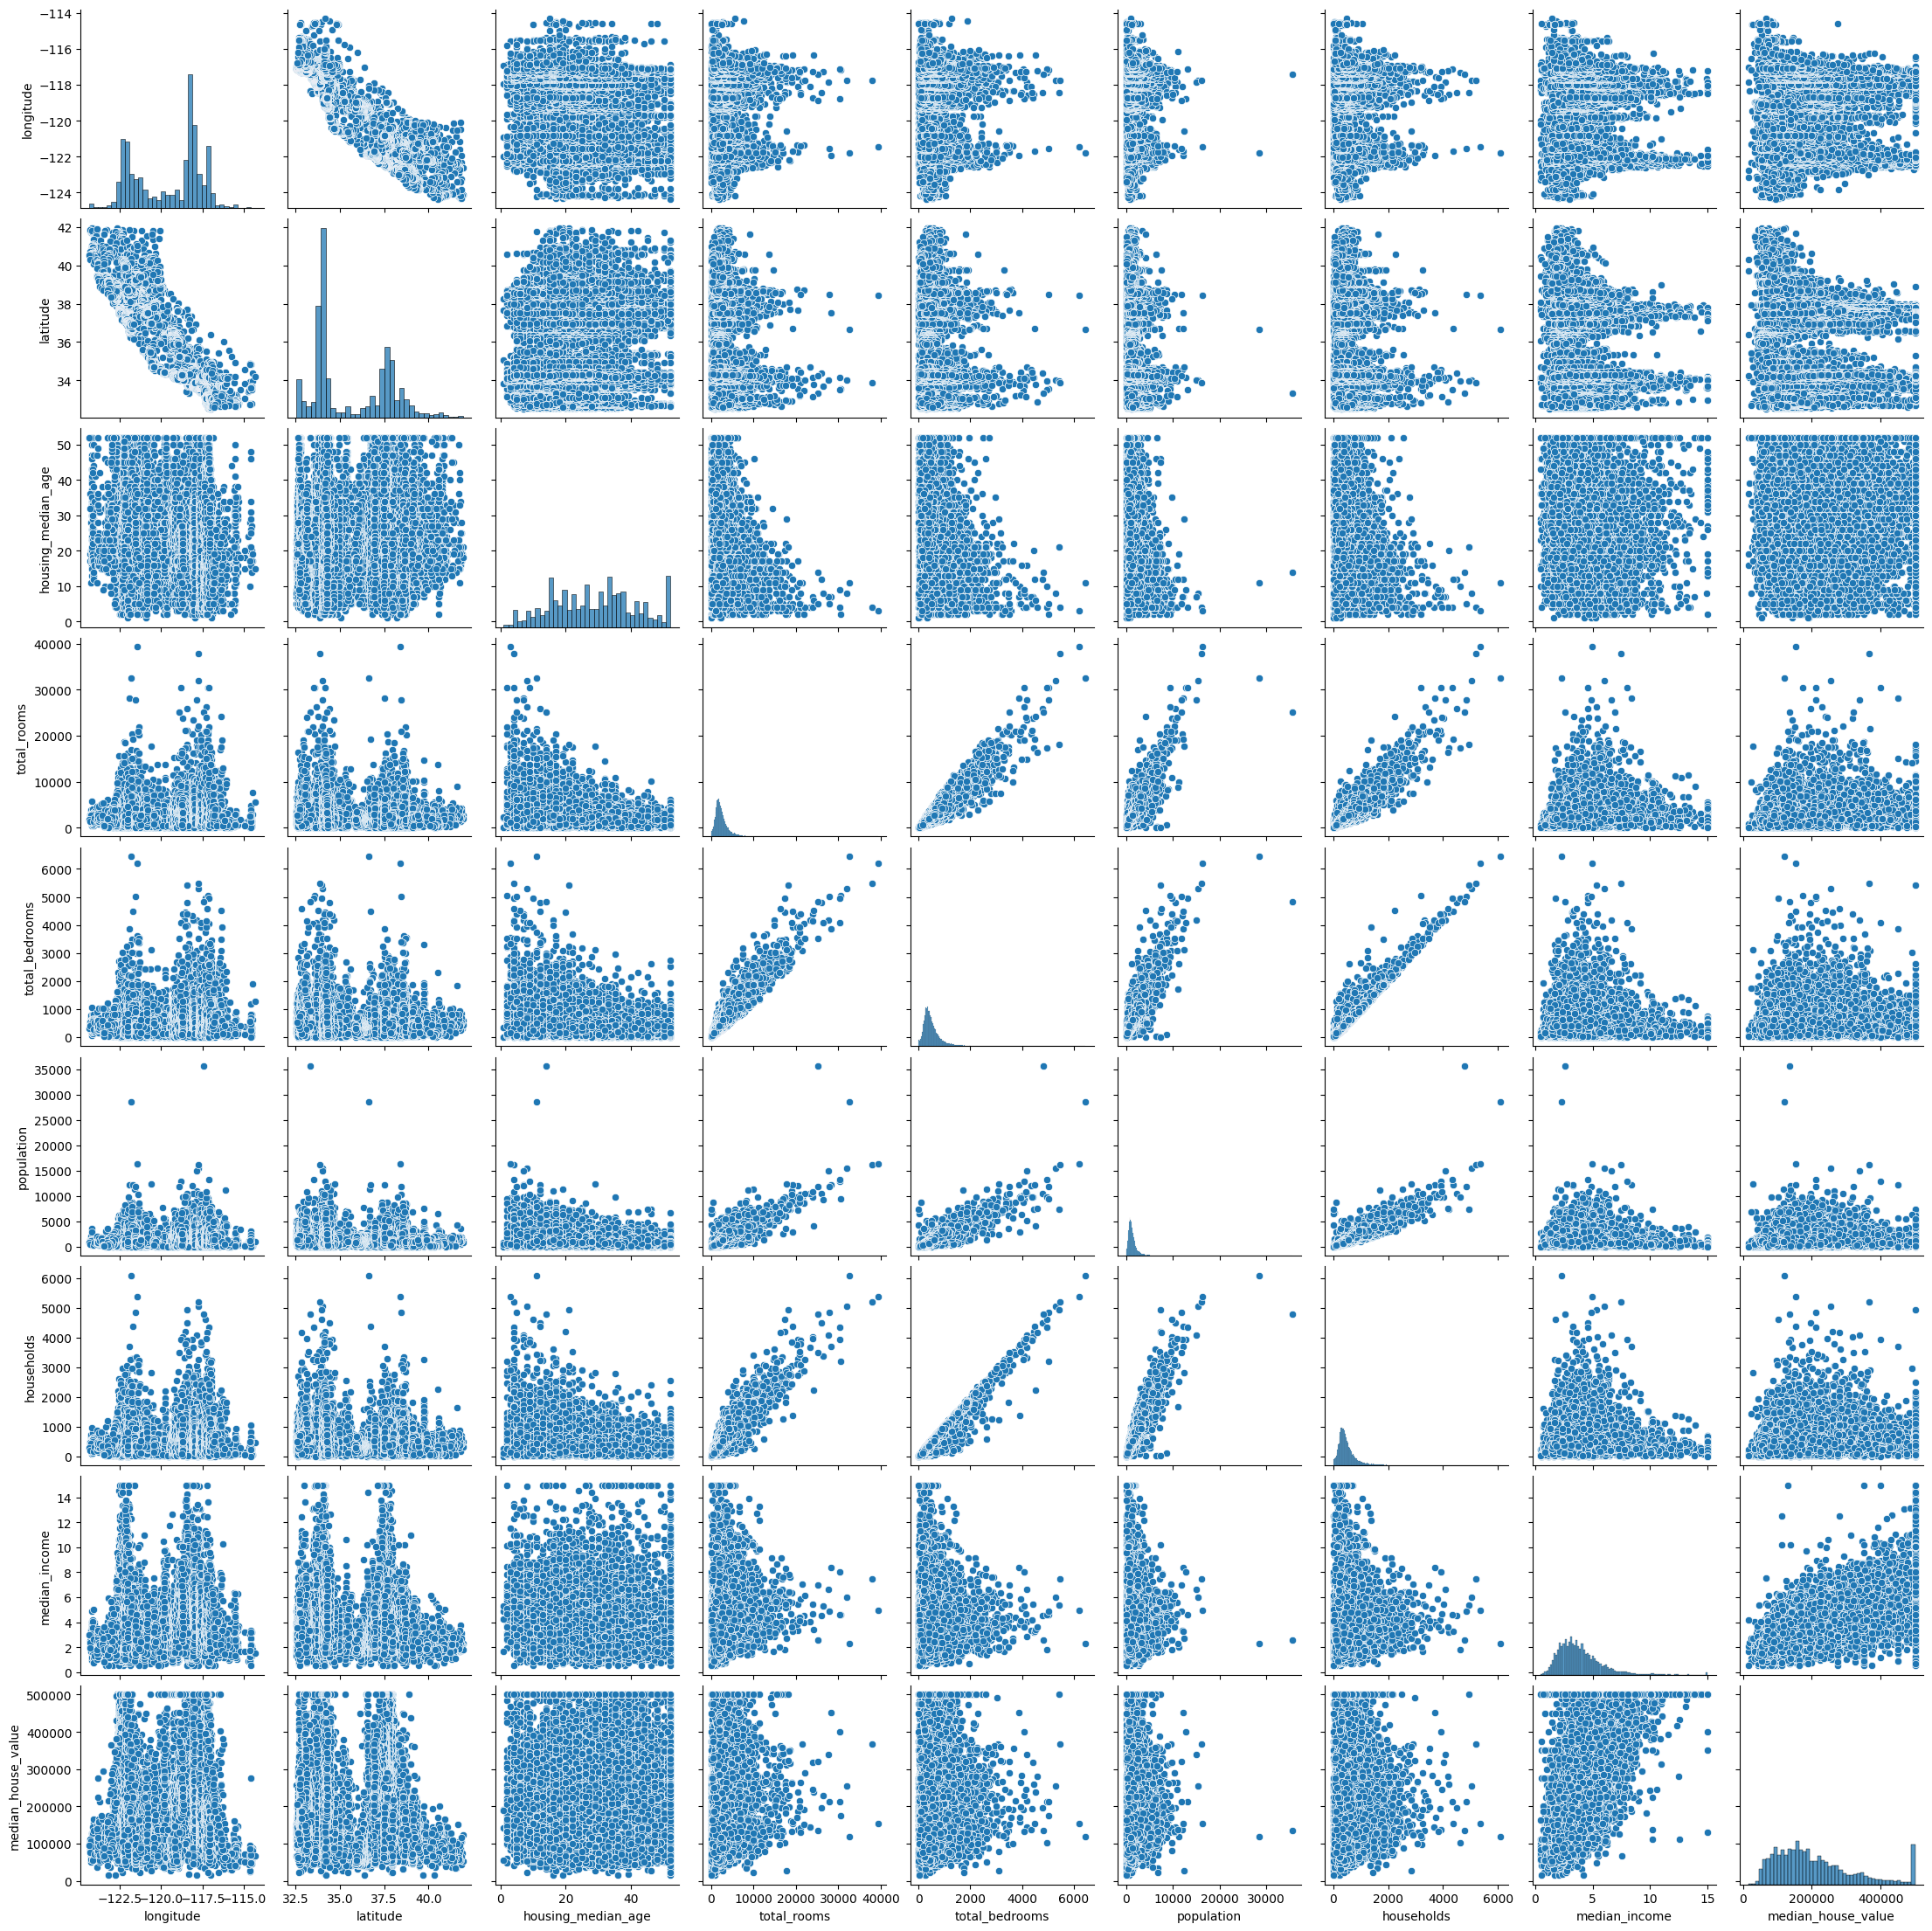

In [71]:
sns.histplot(df['latitude'])
sns.boxplot(data=df)
plt.xticks(rotation=60)
sns.pairplot(df)

In [26]:
df.drop_duplicates(inplace=True)

In [28]:
df.dropna(subset=['total_bedrooms'],inplace=True)

In [29]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [30]:
df.duplicated().sum()

np.int64(0)

Step 5:Spliting Dataset into Traing and testing

In [49]:
# split into training and testing set
x = df.drop(['median_house_value', 'ocean_proximity'], axis=1)
y = df['median_house_value']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train,)

KNeighborsClassifier()

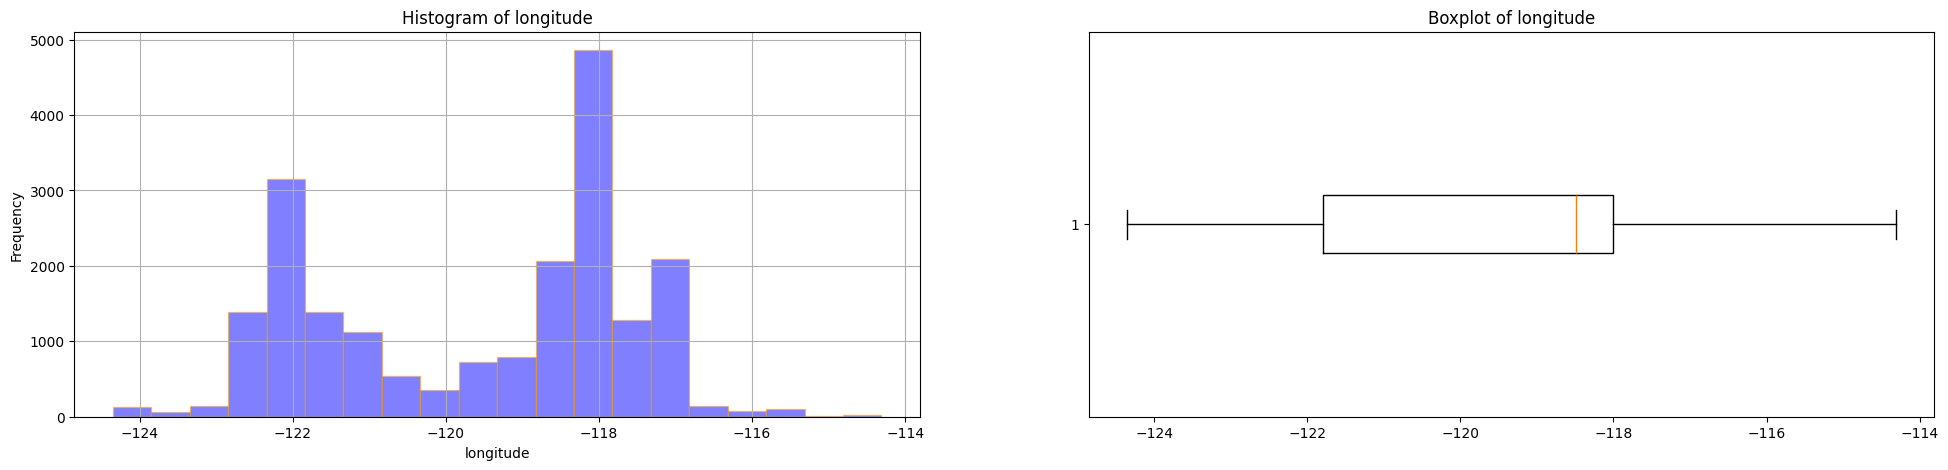

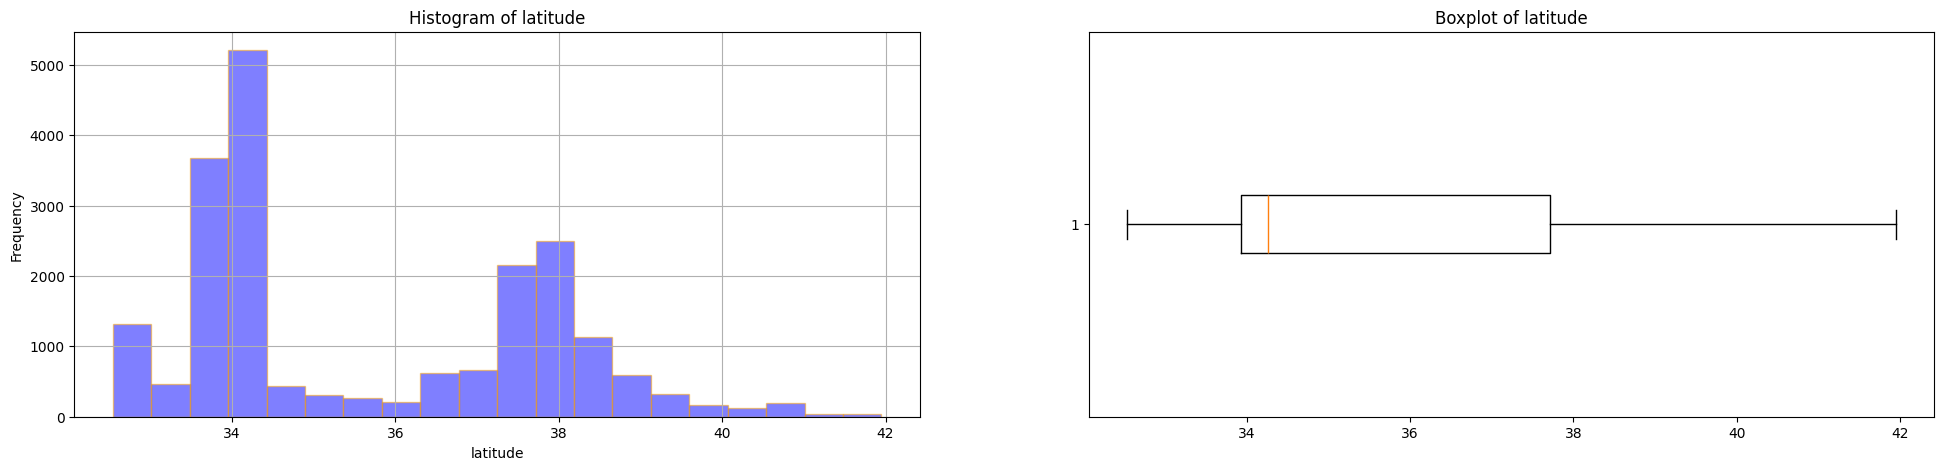

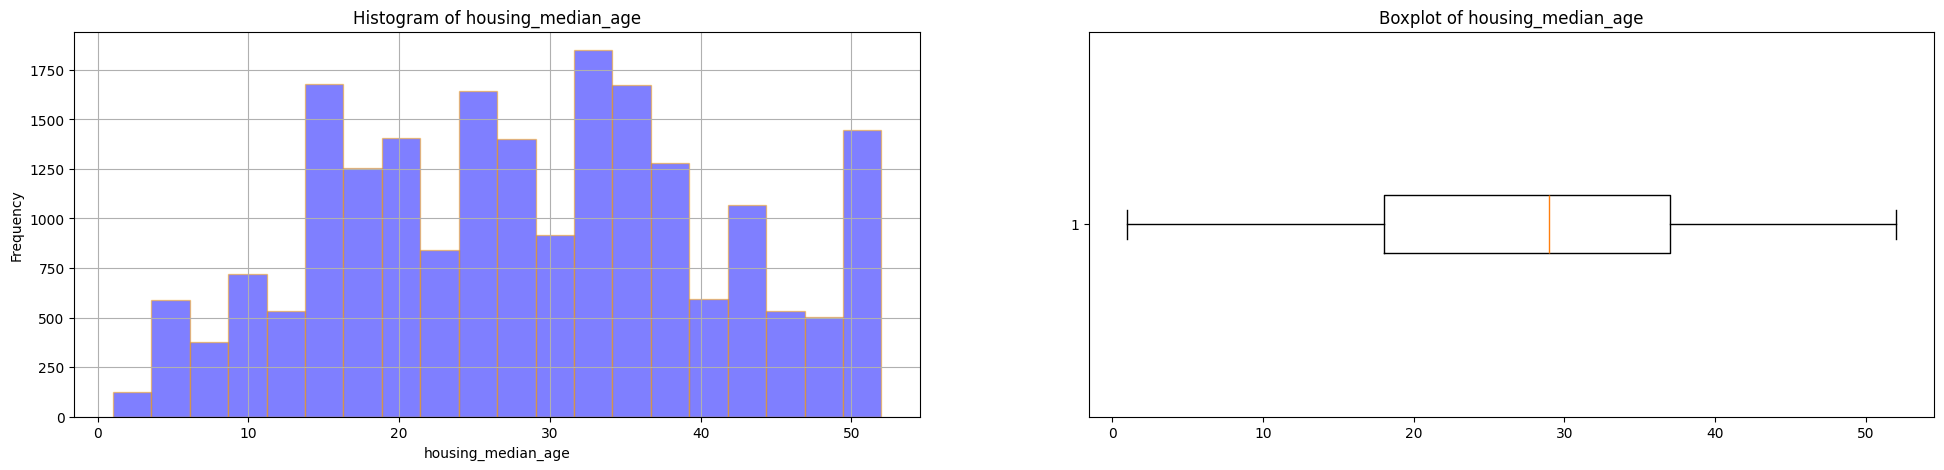

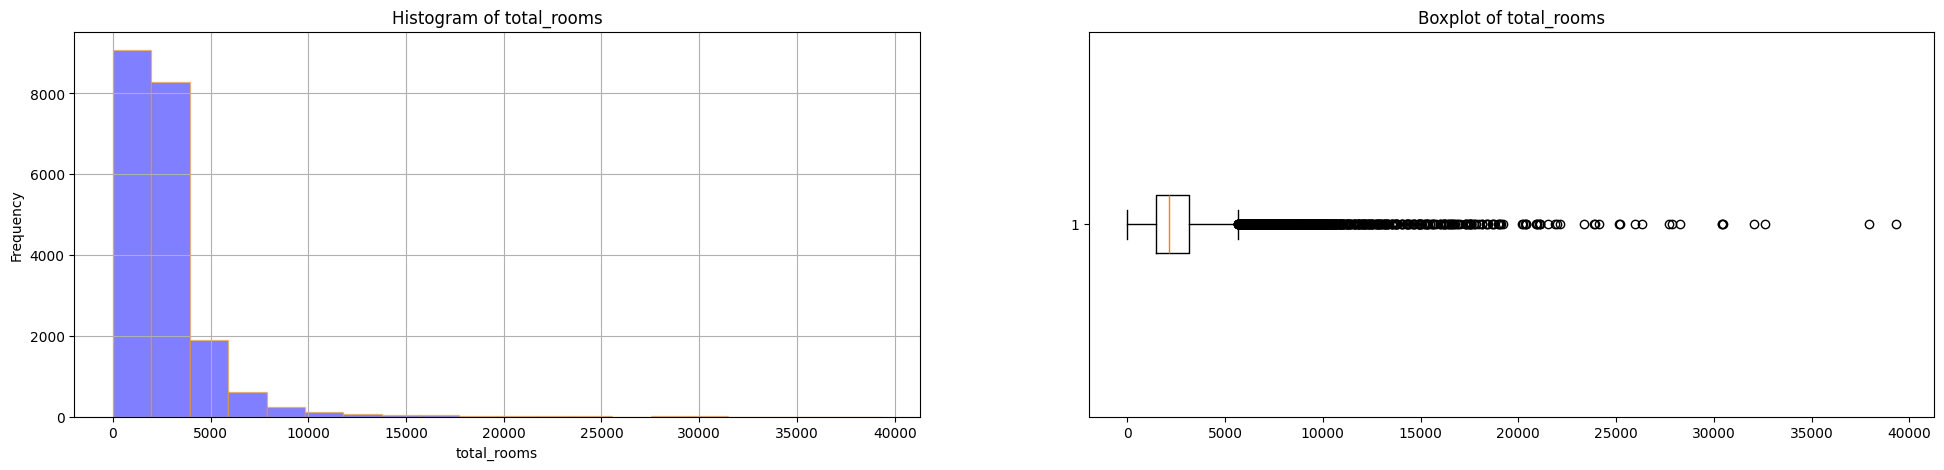

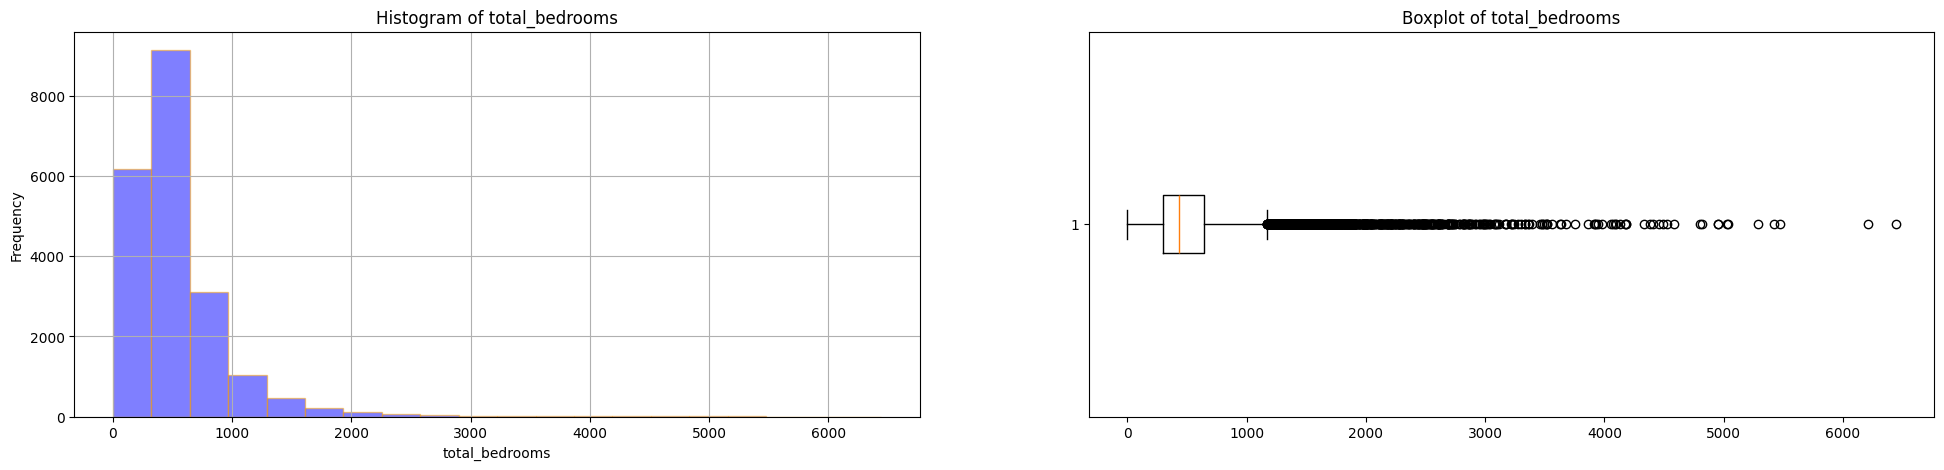

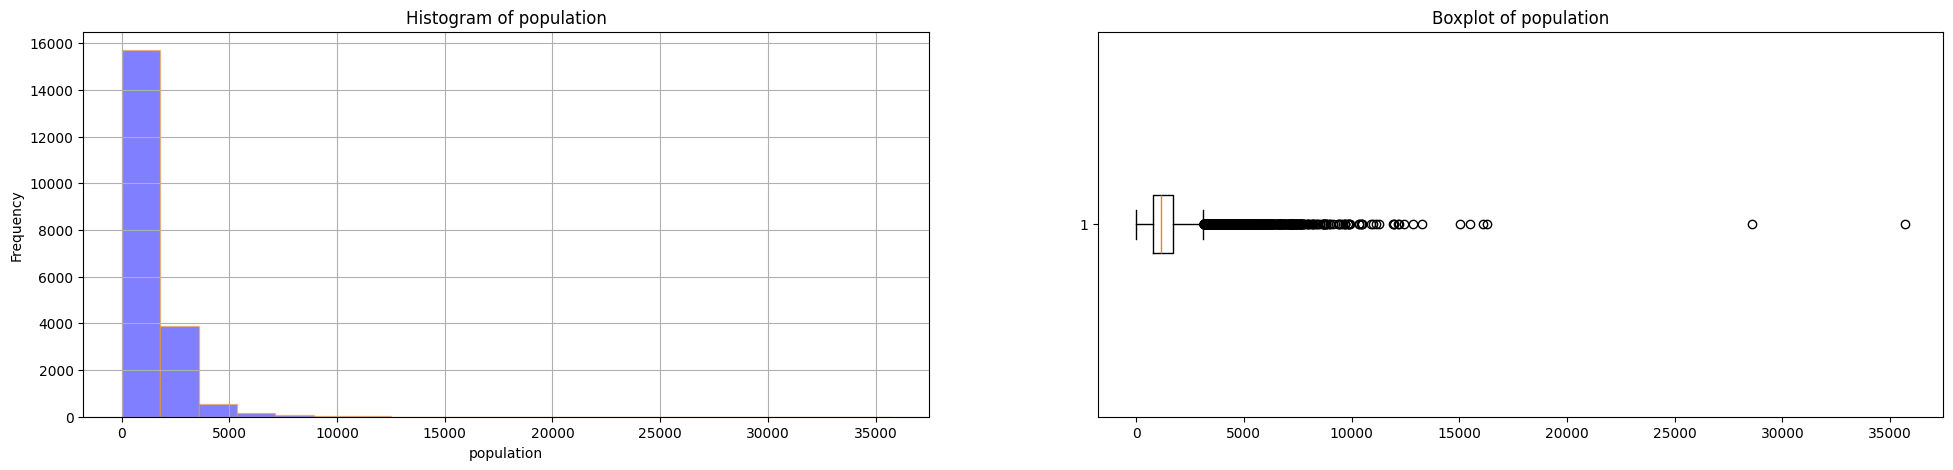

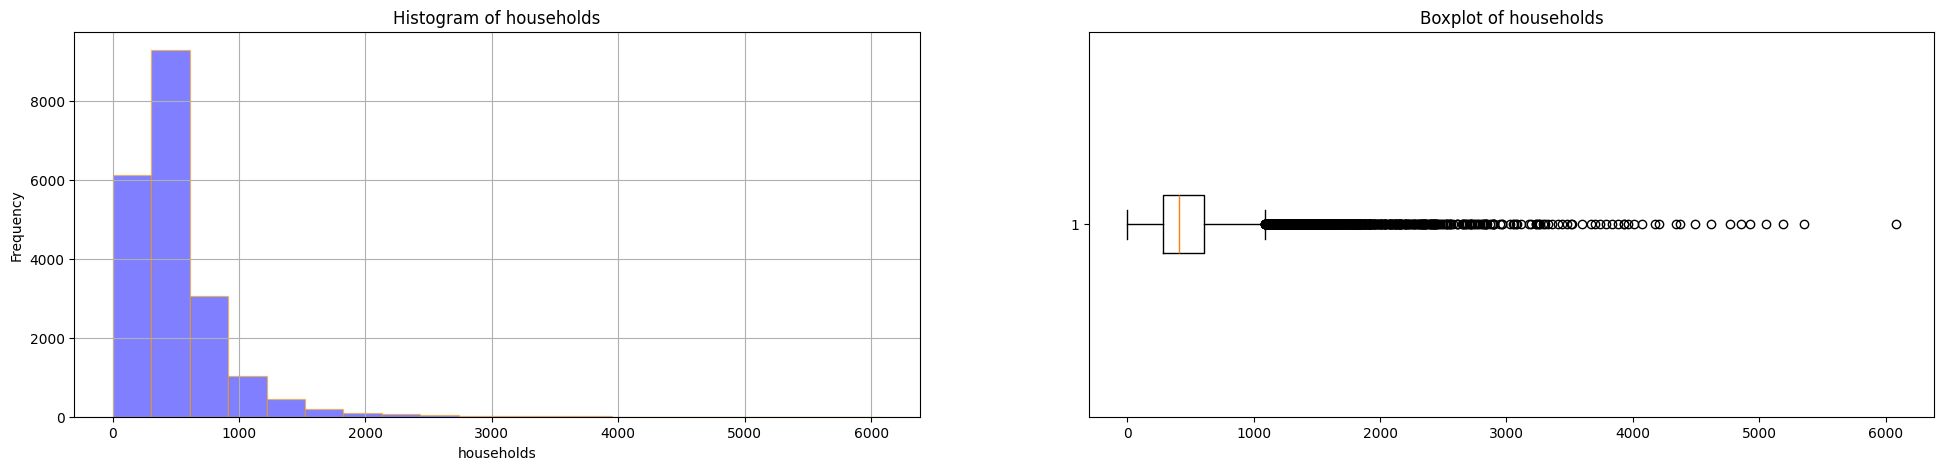

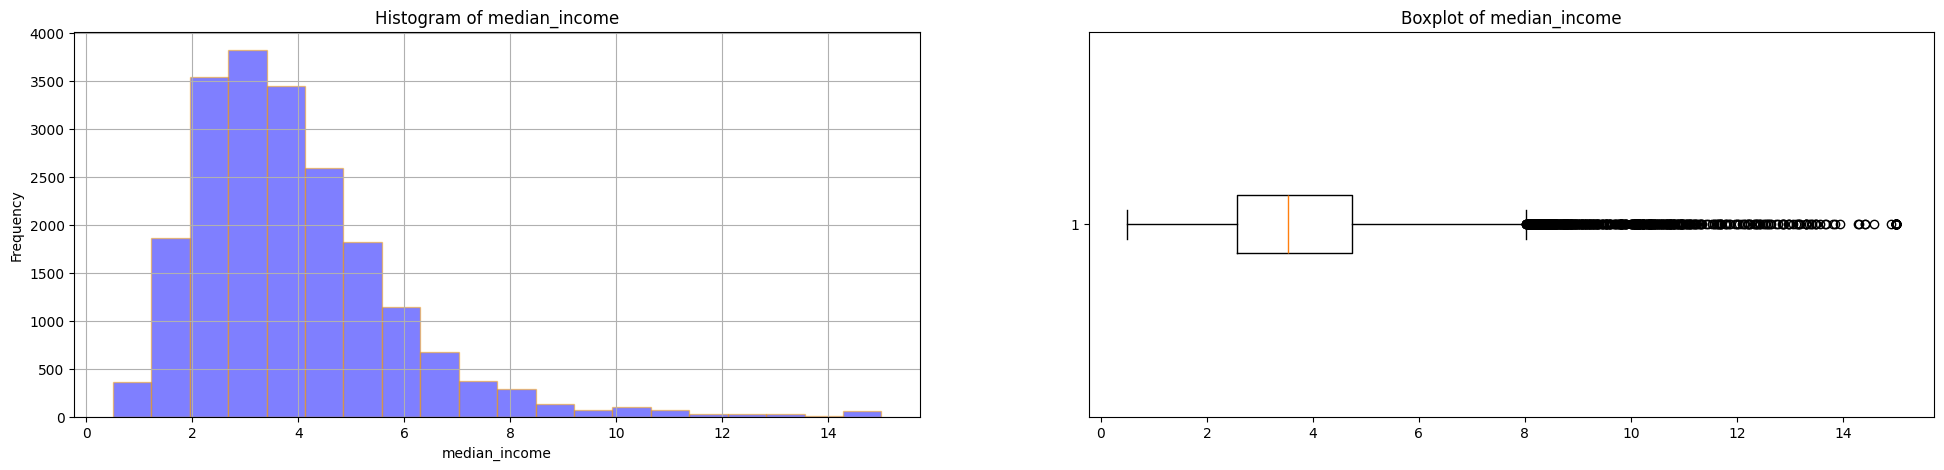

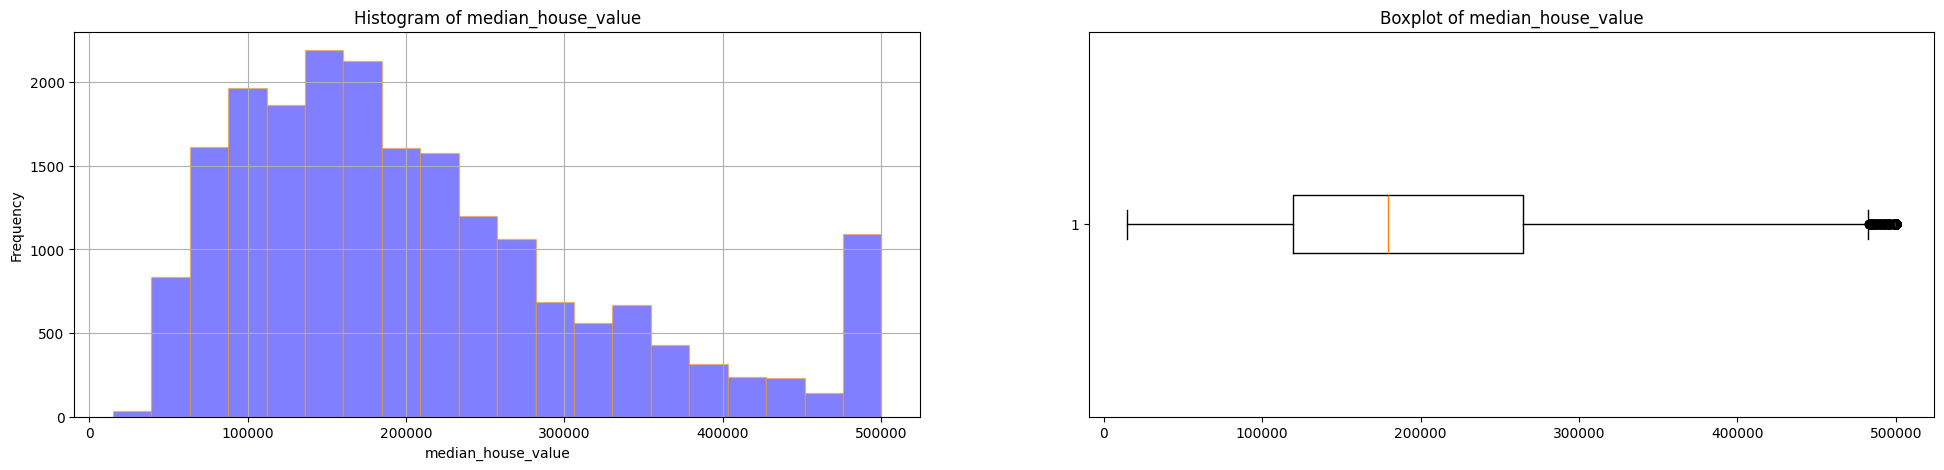

In [65]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

for i in numerical_cols:
  plt.figure(figsize=(24, 5))
  plt.subplot(1, 2, 1)
  df[i].hist(bins=20, alpha=0.5, color='b', edgecolor='orange')
  plt.title(f'Histogram of {i}')
  plt.xlabel(i)
  plt.ylabel('Frequency')

  plt.subplot(1, 2, 2)
  plt.boxplot(df[i], vert=False)
  plt.title(f'Boxplot of {i}')
  plt.show()

In [52]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='households',
    y='total_rooms',
    z='population',
    color='total_rooms',
    title='3-D Housing Visualization')
fig.show()

Step 6:Model Testing and Accurancy

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

model=RandomForestRegressor(n_estimators=8,random_state=0)
model.fit(x_train,y_train)
ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

print("train MSE:",mean_squared_error(ypred_train,y_train))
print("te
st MSE:",mean_squared_error(ypred_test,y_test))
print("train R2:",r2_score(ypred_train,y_train))
print("test R2:",r2_score(ypred_test,y_test))

scores=cross_val_score(model,x,y,cv=5, scoring='r2')
print("cross validation score:",scores.mean())

train MSE: 538422753.7816362
test MSE: 2815958755.6286626
train R2: 0.9541084849942338
test R2: 0.7373009129461527
cross validation score: 0.5447071252044686


In [55]:
import math
# function to calculate entropy
def entropy(column):
  counts = column.value_counts()
  probabilities = counts / counts.sum()
  entropy = -sum(probabilities * np.log2(probabilities))
  return entropy
#function to calculate conditional entropy
def conditional_entropy(data,x,target):
  feature_values = data[x].unique()
  weighted_entropy = 0
  for value in feature_values:
    subset = data[data[x]==value]
    weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])
  return weighted_entropy
#function to calulate the information gain:
def information_gain(data,x,target):
  total_entropy = entropy(data[target])
  feature_conditional_entropy = conditional_entropy(data,x,target)
  return total_entropy - feature_conditional_entropy


#calculate information gain for each feature
for feature in x:
  ig = information_gain(df,feature,'median_house_value')
  print(f"Information gain for {feature}: {ig}")

Information gain for longitude: 5.805012316001332
Information gain for latitude: 5.574292866797639
Information gain for housing_median_age: 2.6995878118774552
Information gain for total_rooms: 8.897779141789938
Information gain for total_bedrooms: 6.922903795156587
Information gain for population: 8.18555842406521
Information gain for households: 6.821270160673695
Information gain for median_income: 9.99066045487714


In [56]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svm_model = SVR()
svm_model.fit(x_train,y_train)

ypred_train = svm_model.predict(x_train)
ypred_test = svm_model.predict(x_test)

print(f"train Mean Squared Error: {mean_squared_error(y_train, ypred_train)}")
print(f"train R-squared: {r2_score(y_train, ypred_train)}")
print(f"test Mean Squared Error: {mean_squared_error(y_test, ypred_test)}")
print(f"test R-squared: {r2_score(y_test, ypred_test)}")

train Mean Squared Error: 13923405061.867374
train R-squared: -0.051864691978131816
test Mean Squared Error: 14421562943.250628
test R-squared: -0.054579326509773374


In [57]:
#predict the values of y based on the x test values
y_pred = model.predict(x_test)
y_pred

array([234962.5, 161062.5, 188450. , ..., 103150. , 118400. , 109750. ])

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Regression Metrics on Test Set:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"R-squared (R2 Score): {r2_score(y_test, y_pred)*100:.2f}%")

Regression Metrics on Test Set:
Mean Absolute Error (MAE): 34715.59585270369
Mean Squared Error (MSE): 2815958755.6286626
R-squared (R2 Score): 79.41%


Conclusion:
- In this project, we applied the complete machine learning workflow to predict house prices using regression techniques. The process included data collection, preprocessing, exploratory data analysis, data cleaning, and splitting the dataset into training and testing sets. Multiple regression models were built and evaluated to compare their performance and accuracy.
- Based on the evaluation results, the most effective model was identified, and feature importance analysis helped us understand which house attributes have the greatest impact on price prediction. Overall, this study demonstrates how regression models, combined with proper data preprocessing and analysis, can be effectively used to make accurate and reliable predictions in real-world scenarios.